In [1]:
#importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import month_plot
from sklearn.model_selection import train_test_split

In [2]:
#importing the dataset
df = pd.read_csv('1979-2021.csv')

In [3]:
#printing the head rows of data
df.head()

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
0,31-01-1979,233.7,144.8,45160.3,117.4,267.1,379.3,1840.8,NaN,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,197.2,194.5
1,28-02-1979,251.3,154.6,50209.1,124.2,295.5,413.6,2011.7,NaN,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,219.6,209.4
2,30-03-1979,240.1,148.0,50274.3,116.2,278.2,406.2,1940.2,NaN,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,214.6,202.4
3,30-04-1979,245.3,152.8,54144.6,118.8,278.5,420.0,2013.1,NaN,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,221.1,206.9
4,31-05-1979,274.6,172.0,61057.1,132.7,321.6,478.0,2253.4,NaN,NaN,933.3,171656.1,1048.4,5560.8,NaN,NaN,133889.6,250.7,233.7


In [4]:
df.shape

(511, 19)

In [5]:
#checking whether there is any null row exist or not
df.isnull().sum()

Date                           0
United States(USD)             0
Europe(EUR)                    0
Japan(JPY)                     0
United Kingdom(GBP)            0
Canada(CAD)                    0
Switzerland(CHF)               0
India(INR)                     0
China(CNY)                    72
Turkey(TRY)                   47
Saudi Arabia(SAR)              0
Indonesia(IDR)                 0
United Arab Emirates(AED)      0
Thailand(THB)                  0
Vietnam(VND)                 131
Egypt(EGP)                   119
South Korean(KRW)              0
Australia(AUD)                 0
South Africa(ZAR)              0
dtype: int64

In [6]:
#dropping Vietnam and Egypt as there are more than 100 null rows
df.drop(['Vietnam(VND)','Egypt(EGP)'], axis = 1, inplace = True)

In [7]:
#checking the mean of China's gold price so that null values can be replaced with that
df['China(CNY)'].describe()

count      439.000000
mean      4883.284510
std       3298.648486
min        821.100000
25%       2171.350000
50%       3287.800000
75%       7991.050000
max      13714.000000
Name: China(CNY), dtype: float64

In [8]:
df['China(CNY)'].min()

821.1

In [9]:
df[df['China(CNY)'] == 821.1]

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),South Korean(KRW),Australia(AUD),South Africa(ZAR)
73,28-02-1985,287.8,400.5,75449.3,266.4,402.5,829.8,3783.1,821.1,0.1,1047.7,311937.8,1043.7,8002.2,244833.3,410.6,587.7


In [10]:
df['Turkey(TRY)'].describe()

count      464.000000
mean      1739.875862
std       3058.649089
min          0.100000
25%          2.475000
50%        446.050000
75%       2595.025000
max      16105.400000
Name: Turkey(TRY), dtype: float64

In [11]:
df[df['Turkey(TRY)'] == 0.100000]

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),South Korean(KRW),Australia(AUD),South Africa(ZAR)
47,31-12-1982,456.9,429.9,105366.4,282.5,551.2,899.8,4320.0,NaN,0.1,1543.1,310012.9,1642.3,10240.0,335836.8,456.8,482.6
48,31-01-1983,499.5,486.1,120786.2,328.6,622.1,1013.5,5003.5,NaN,0.1,1735.0,352513.8,1852.2,11532.6,400806.0,519.9,540.4
49,28-02-1983,408.5,394.4,99730.8,269.6,515.8,864.3,4197.0,NaN,0.1,1441.9,293998.0,1539.5,9612.9,316076.2,440.2,456.8
50,31-03-1983,414.8,410.9,98978.0,279.6,510.7,863.4,4104.3,NaN,0.1,1427.4,285570.5,1489.6,9437.1,316200.1,477.0,453.9
51,29-04-1983,429.3,430.9,101942.2,275.1,525.3,886.2,4286.4,NaN,0.1,1479.0,415182.8,1577.8,9808.4,329045.2,494.0,467.5
52,31-05-1983,437.5,447.3,104996.1,272.7,540.2,921.2,4391.8,NaN,0.1,1521.4,425128.2,1606.1,9997.5,338512.6,497.7,471.2
53,30-06-1983,416.0,431.7,99204.6,271.9,513.3,872.9,4183.6,NaN,0.1,1433.3,410375.4,1545.3,9614.1,323650.9,476.1,456.9
54,29-07-1983,422.0,456.5,102097.1,277.5,521.0,899.5,4291.0,NaN,0.1,1456.0,414510.2,1549.4,9741.9,330624.8,479.9,464.6
55,31-08-1983,414.3,452.9,102099.2,277.3,511.2,906.6,4219.7,NaN,0.1,1441.3,410061.3,1525.7,9530.2,327496.6,471.9,466.5
56,30-09-1983,405.0,440.9,95265.3,270.5,497.8,857.5,4123.3,NaN,0.1,1404.2,399655.3,1490.0,9310.6,318877.1,450.2,445.6


In [12]:
#dropping China, Turkey because if null values are replaced by mean then the model won't work good
df.drop(['China(CNY)', 'Turkey(TRY)'], axis = 1, inplace = True)

In [13]:
df.shape

(511, 15)

In [14]:
x = df['Date']
y = df.drop('Date', axis = 1)

In [15]:
y.columns

Index(['United States(USD)', 'Europe(EUR)', 'Japan(JPY)',
       'United Kingdom(GBP)', 'Canada(CAD)', 'Switzerland(CHF)', 'India(INR)',
       'Saudi Arabia(SAR)', 'Indonesia(IDR)', 'United Arab Emirates(AED)',
       'Thailand(THB)', 'South Korean(KRW)', 'Australia(AUD)',
       'South Africa(ZAR)'],
      dtype='object')

In [16]:
x.shape

(511,)

In [17]:
y.shape

(511, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       511 non-null    object 
 1   United States(USD)         511 non-null    float64
 2   Europe(EUR)                511 non-null    float64
 3   Japan(JPY)                 511 non-null    float64
 4   United Kingdom(GBP)        511 non-null    float64
 5   Canada(CAD)                511 non-null    float64
 6   Switzerland(CHF)           511 non-null    float64
 7   India(INR)                 511 non-null    float64
 8   Saudi Arabia(SAR)          511 non-null    float64
 9   Indonesia(IDR)             511 non-null    float64
 10  United Arab Emirates(AED)  511 non-null    float64
 11  Thailand(THB)              511 non-null    float64
 12  South Korean(KRW)          511 non-null    float64
 13  Australia(AUD)             511 non-null    float64

In [19]:
#splitting the year from dates
df['year'] = df['Date'].apply(lambda x:x.split('-')[2])

In [20]:
#Checking the head of the dataset
df.head()

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),South Korean(KRW),Australia(AUD),South Africa(ZAR),year
0,31-01-1979,233.7,144.8,45160.3,117.4,267.1,379.3,1840.8,745.2,139739.3,856.1,4511.3,108235.8,197.2,194.5,1979
1,28-02-1979,251.3,154.6,50209.1,124.2,295.5,413.6,2011.7,827.8,154683.1,946.6,4985.7,119929.3,219.6,209.4,1979
2,30-03-1979,240.1,148.0,50274.3,116.2,278.2,406.2,1940.2,796.7,148844.2,910.4,4812.9,116123.6,214.6,202.4,1979
3,30-04-1979,245.3,152.8,54144.6,118.8,278.5,420.0,2013.1,819.4,152453.6,930.2,4891.0,117423.3,221.1,206.9,1979
4,31-05-1979,274.6,172.0,61057.1,132.7,321.6,478.0,2253.4,933.3,171656.1,1048.4,5560.8,133889.6,250.7,233.7,1979


In [21]:
#grouping the dataset by year for analysis
df.groupby(by = 'year')[['year','Date','United States(USD)','Europe(EUR)','Japan(JPY)','United Kingdom(GBP)','Canada(CAD)',
                         'Switzerland(CHF)','India(INR)','Saudi Arabia(SAR)','Indonesia(IDR)','United Arab Emirates(AED)',
                         'Thailand(THB)','South Korean(KRW)','Australia(AUD)','South Africa(ZAR)']]

In [22]:
sns.set_style('dark')

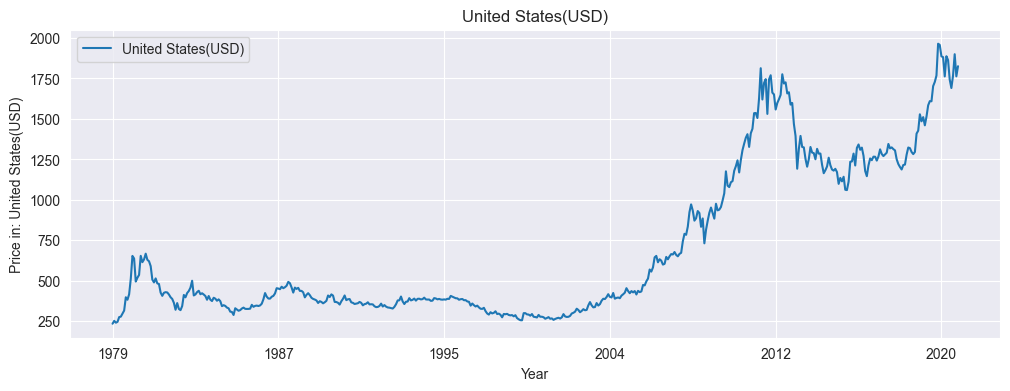

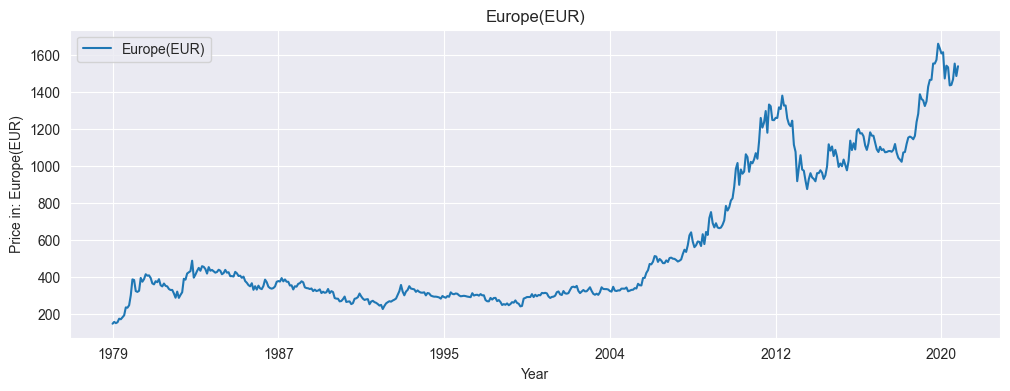

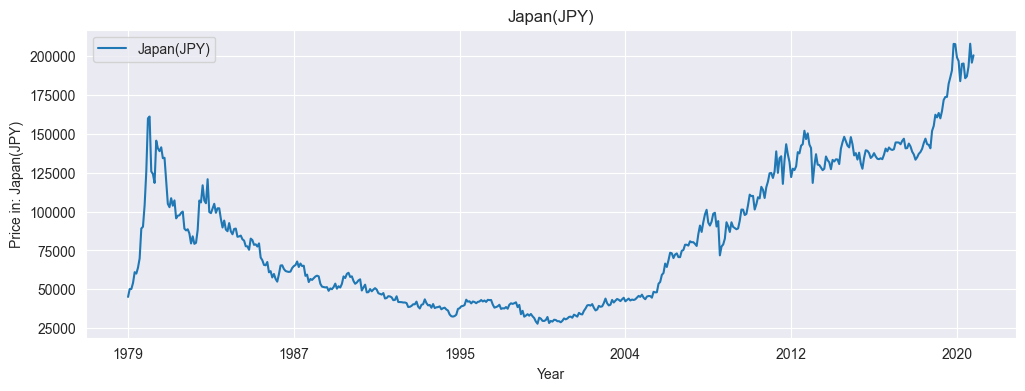

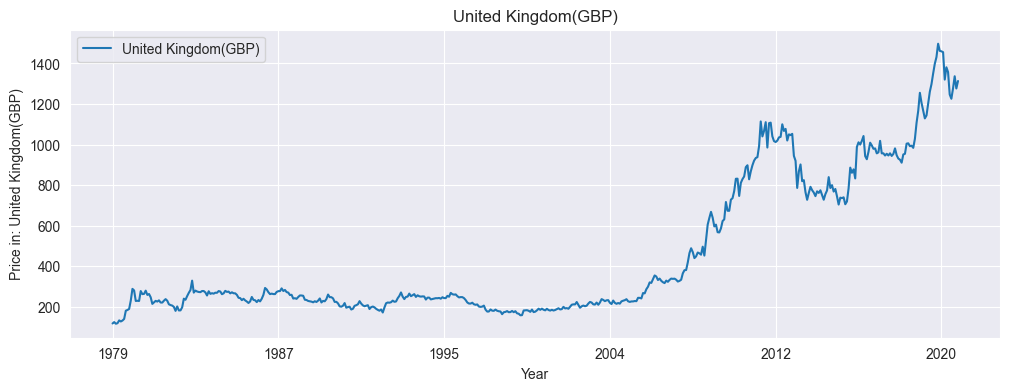

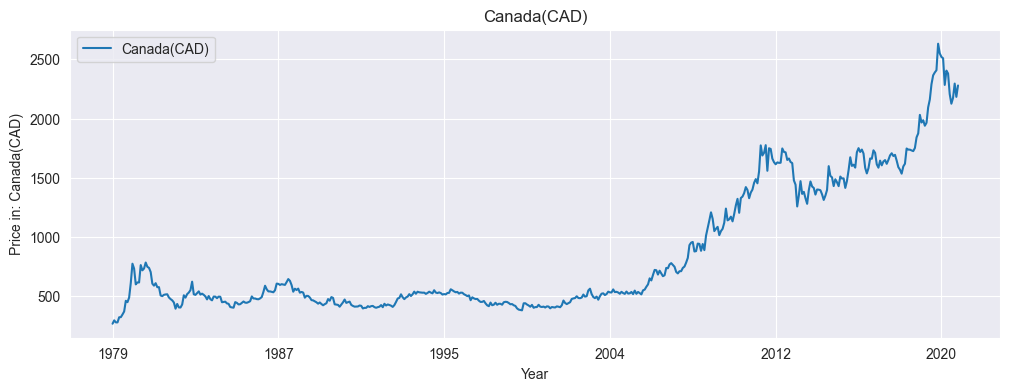

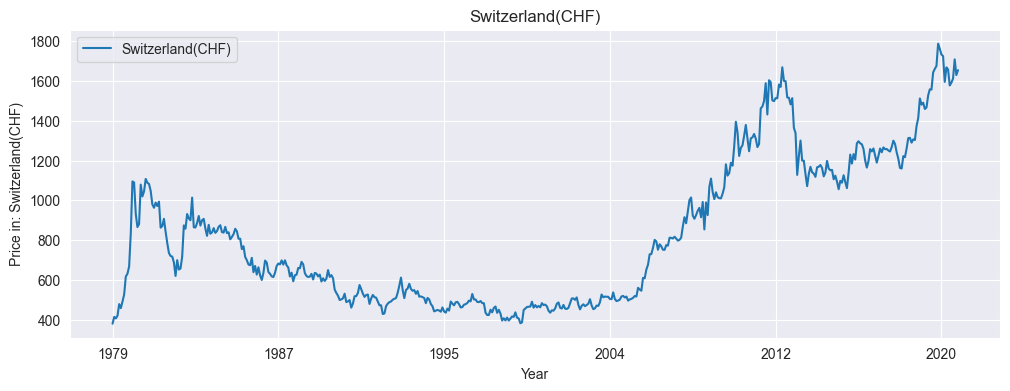

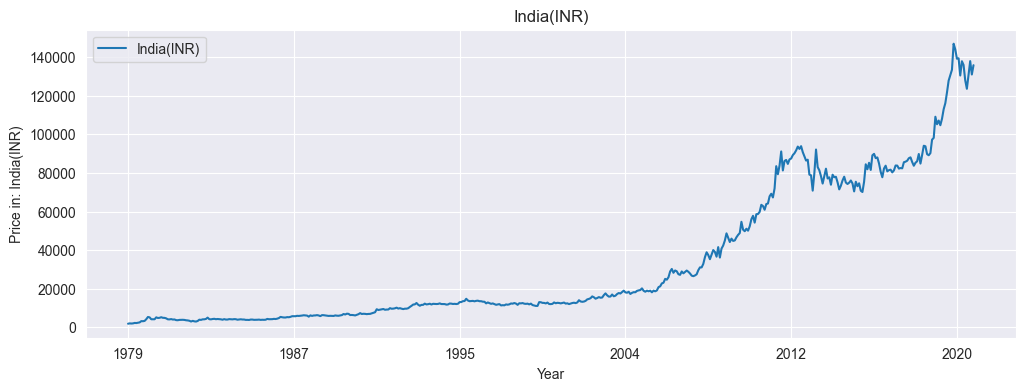

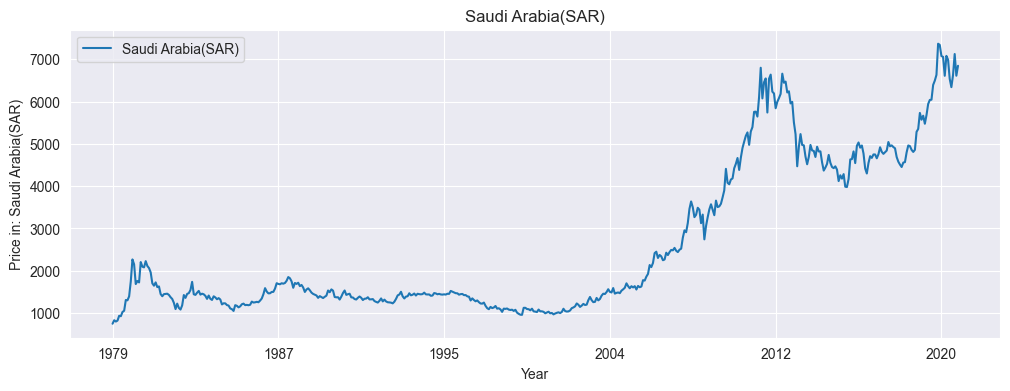

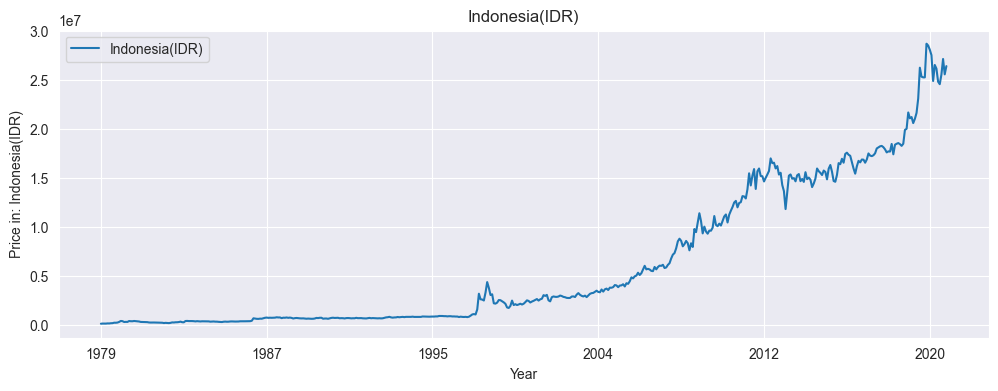

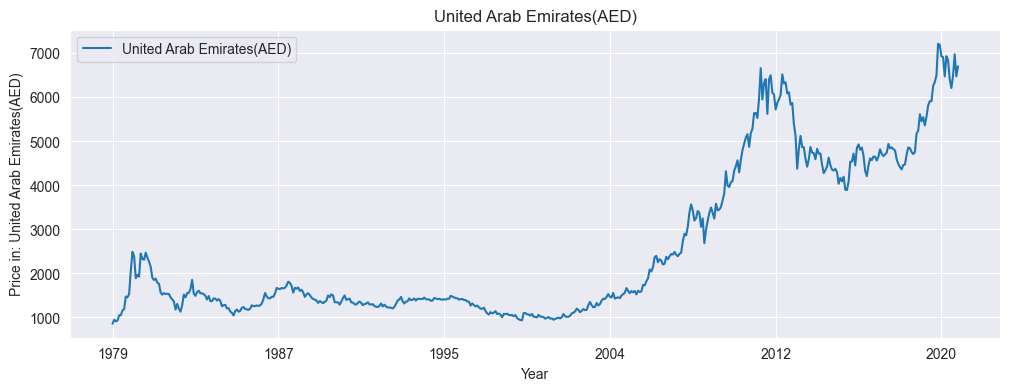

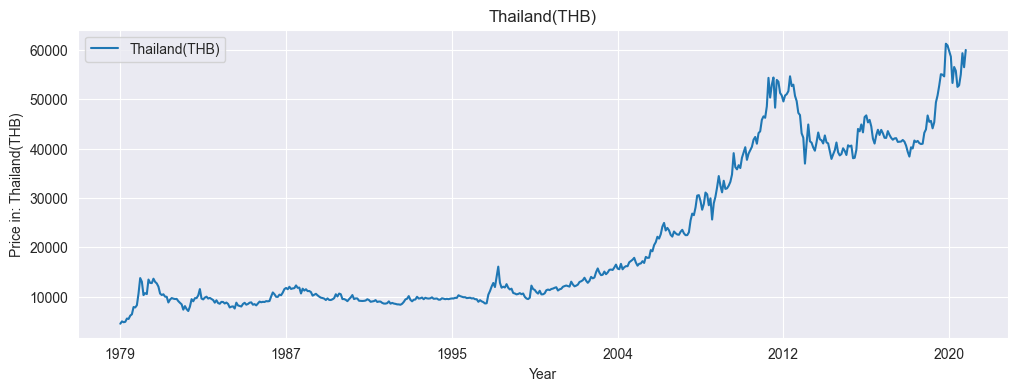

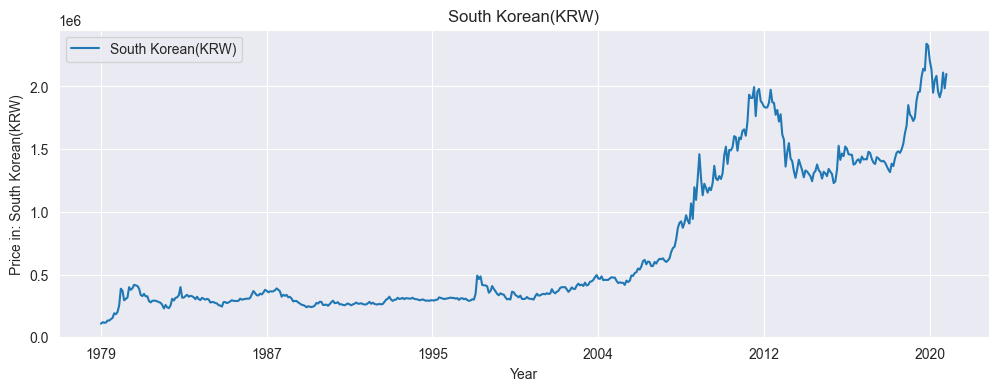

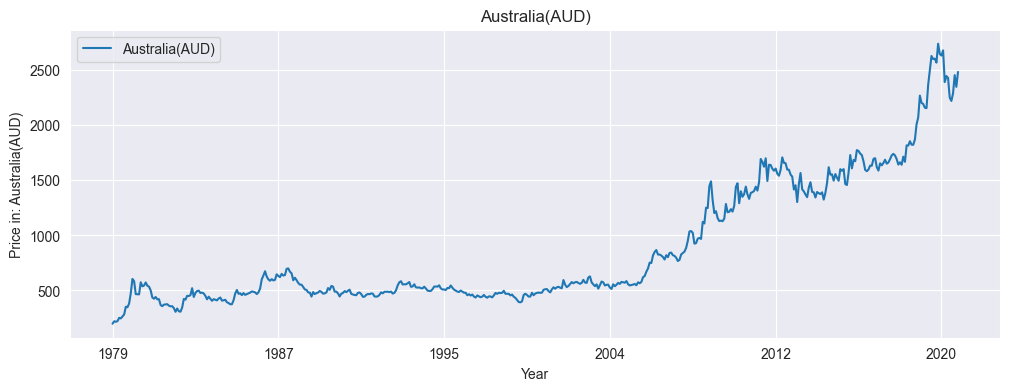

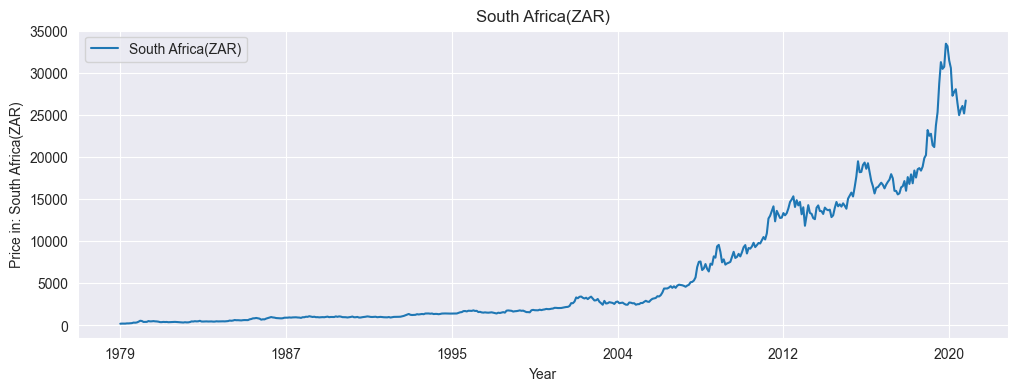

In [23]:
#plot of all the countries
for col in y.columns:   
    df.plot(x='year',y=col, figsize=(12,4))
    plt.title(col)
    plt.xlabel('Year')
    plt.ylabel('Price in: {}'.format(col))
    plt.grid()

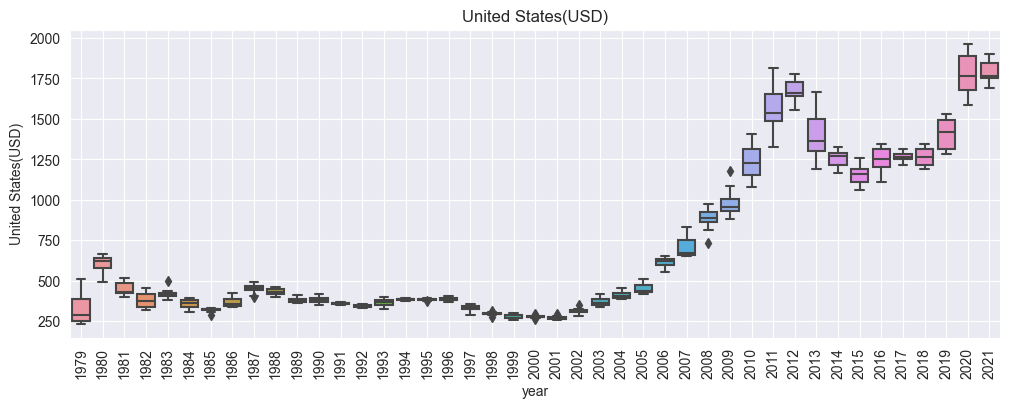

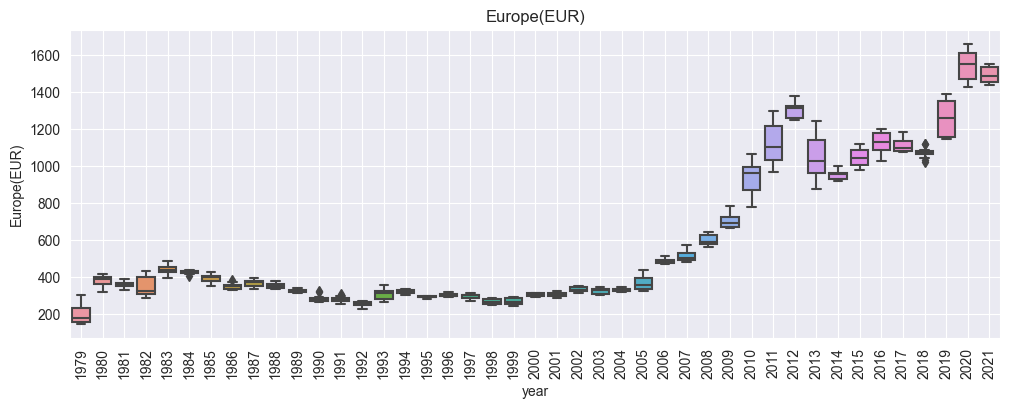

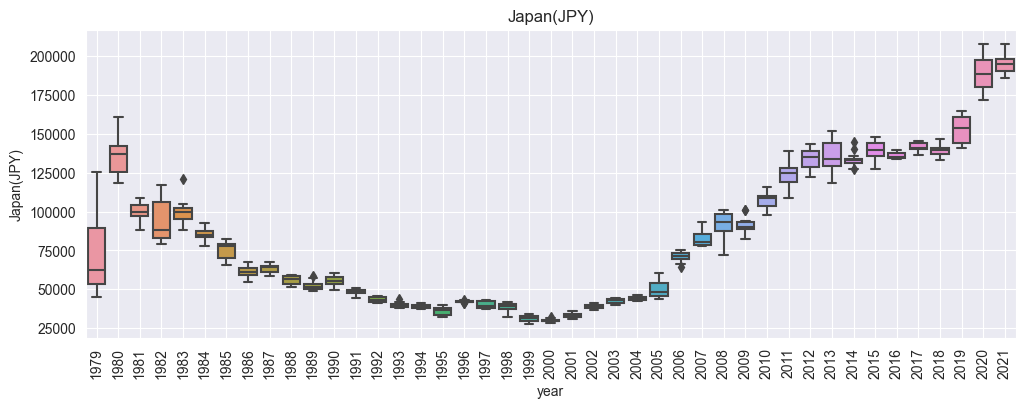

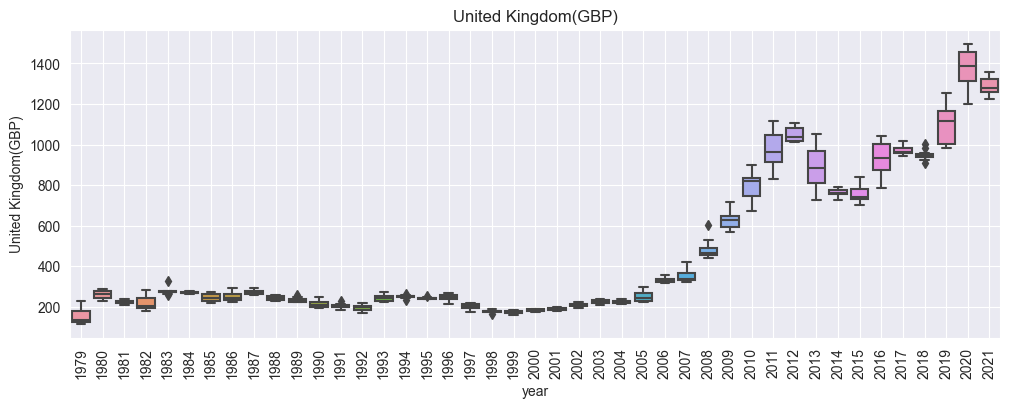

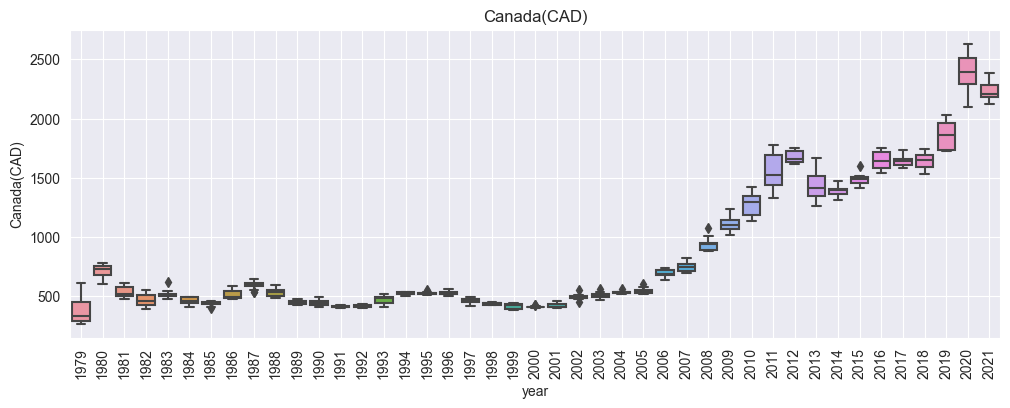

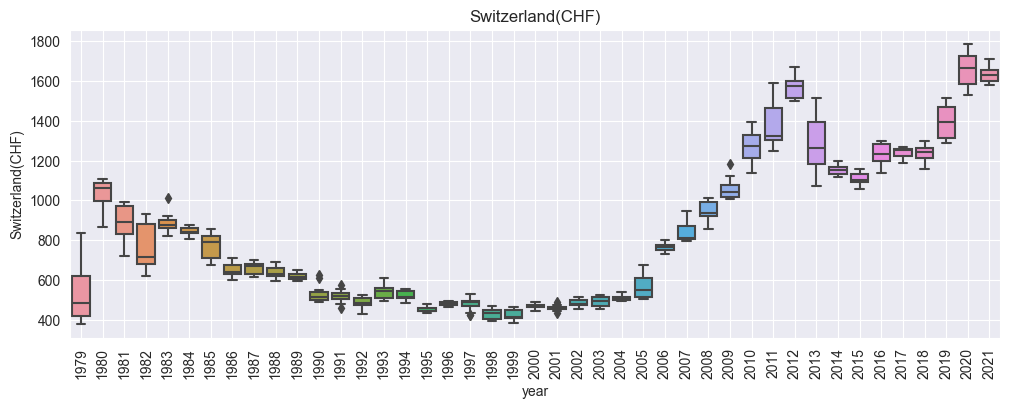

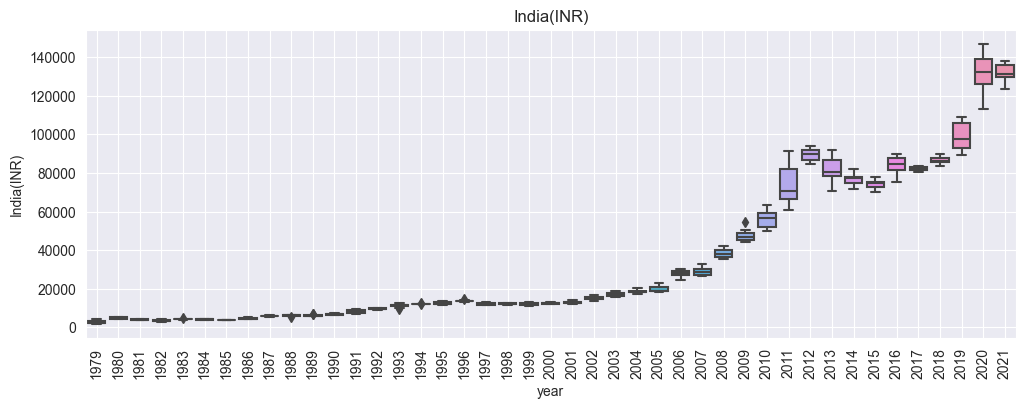

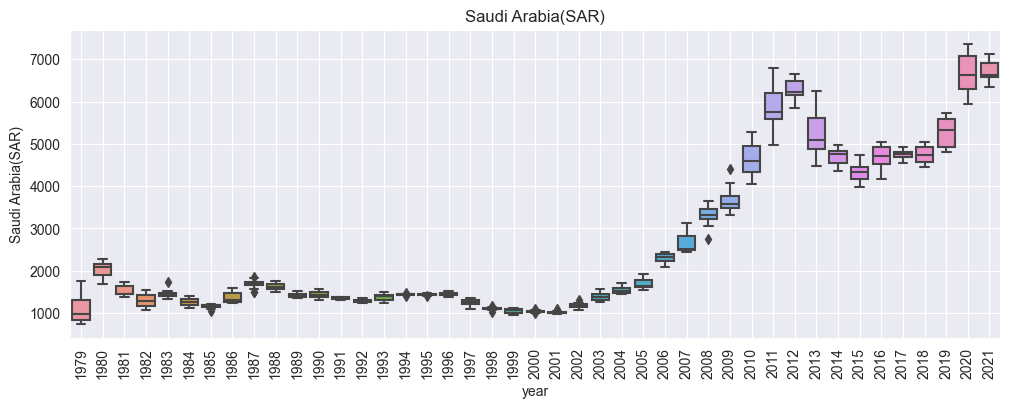

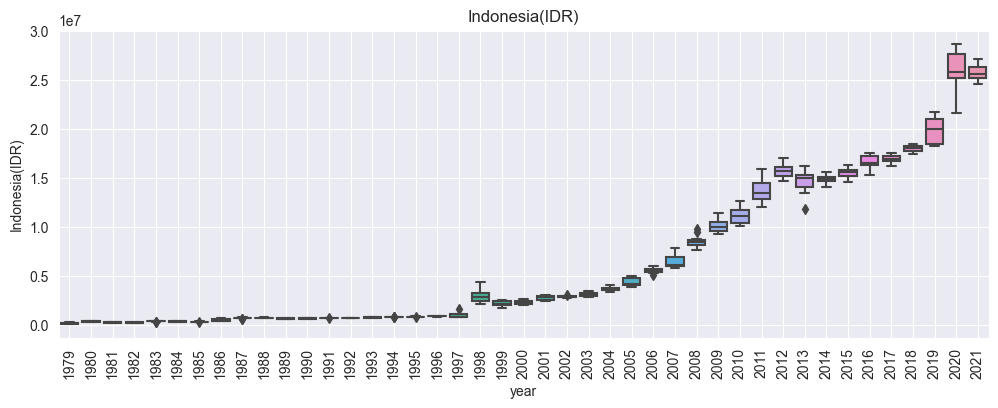

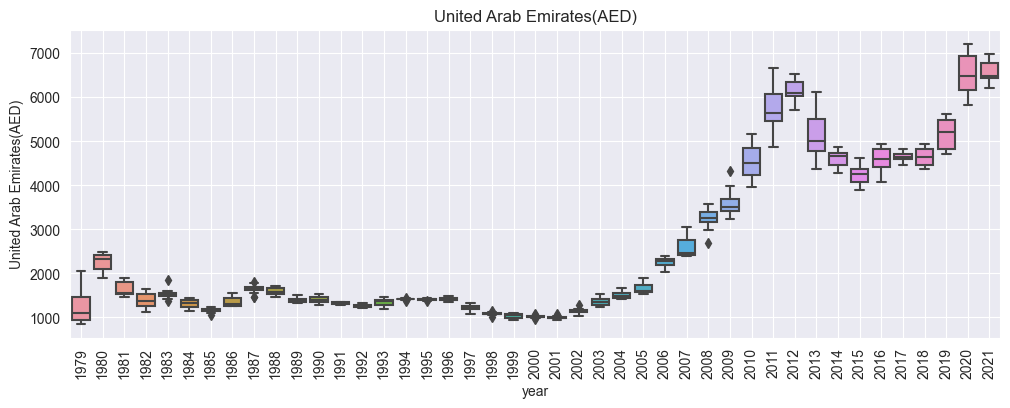

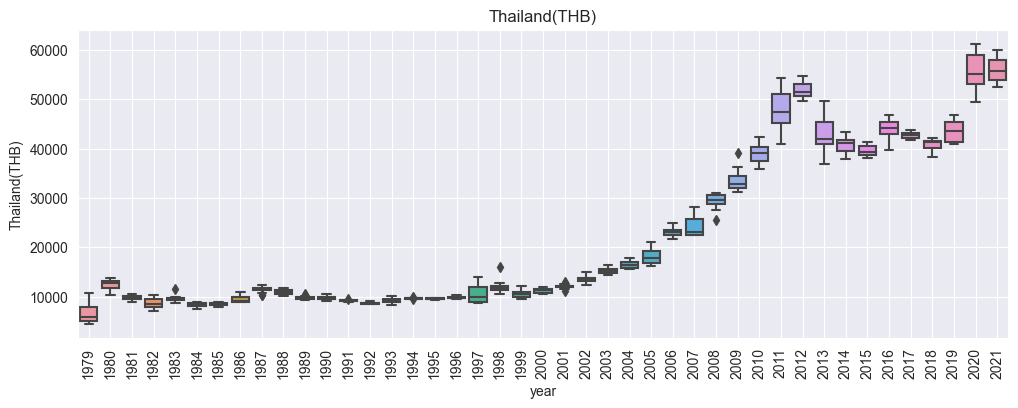

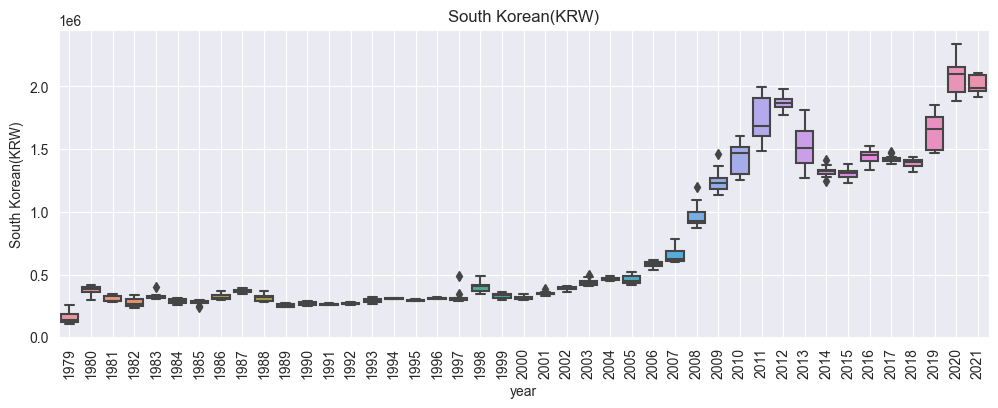

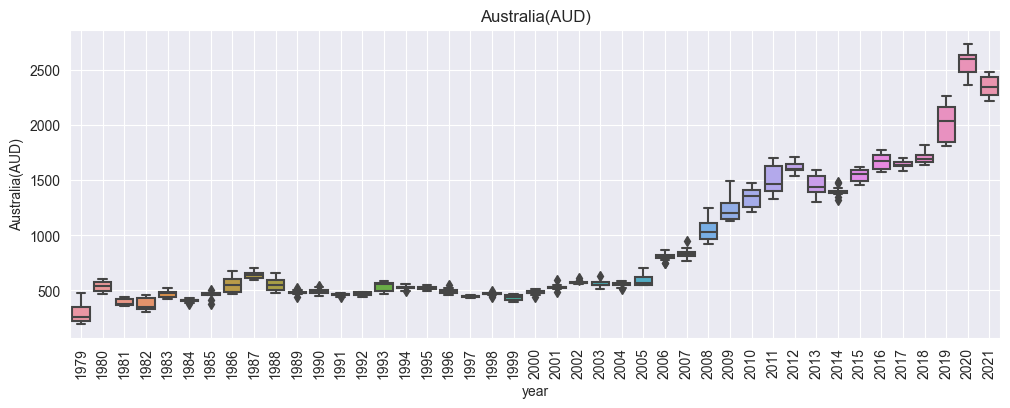

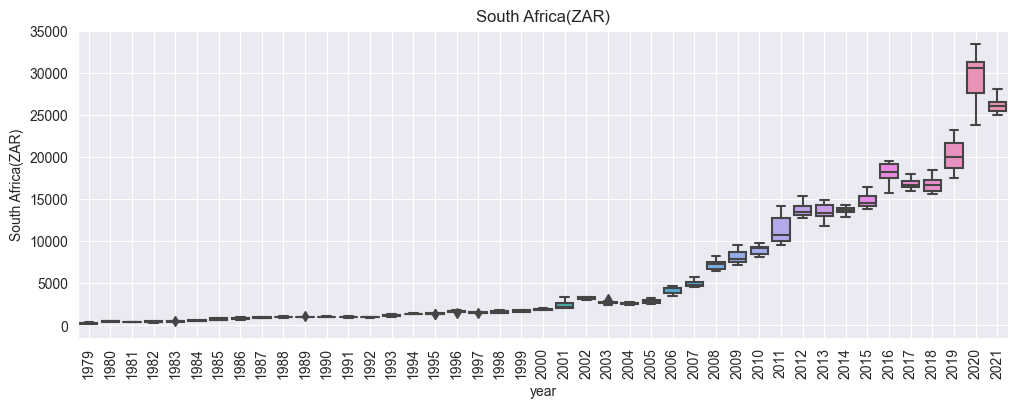

In [24]:
#boxplot of all the countries
for col in y.columns:   
    plt.figure(figsize = (12,4))
    plt.title(col)
    sns.boxplot(x='year', y=y[col], data=df)
    plt.xticks(rotation=90)
    plt.grid()

In [25]:
df.shape

(511, 16)

In [26]:
df.tail()

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),South Korean(KRW),Australia(AUD),South Africa(ZAR),year
506,31-03-2021,1691.1,1438.8,186861.0,1225.7,2125.4,1591.5,123639.0,6342.1,24562502.0,6211.5,52845.3,1913845.9,2220.3,24970.5,2021
507,30-04-2021,1767.7,1468.4,193213.0,1276.7,2174.6,1612.2,130934.3,6628.9,25533702.8,6492.8,55040.2,1966245.4,2288.4,25644.2,2021
508,31-05-2021,1900.0,1554.0,207845.0,1336.6,2295.3,1708.7,137979.1,7125.4,27131285.3,6978.3,59344.9,2110939.4,2454.6,26067.3,2021
509,30-06-2021,1763.2,1486.8,195692.0,1276.3,2183.3,1629.8,131054.9,6612.5,25565673.6,6476.3,56509.0,1985571.3,2348.5,25175.6,2021
510,30-07-2021,1825.8,1539.7,200376.1,1313.2,2279.2,1654.7,135863.2,6847.3,26404909.4,6706.3,60007.8,2100068.9,2483.8,26708.4,2021


In [27]:
#replacing index with dates with monthly frequency
date = pd.date_range(start='31/1/1979', end = '30/8/2021', freq = 'M')

In [28]:
date

DatetimeIndex(['1979-01-31', '1979-02-28', '1979-03-31', '1979-04-30',
               '1979-05-31', '1979-06-30', '1979-07-31', '1979-08-31',
               '1979-09-30', '1979-10-31',
               ...
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31'],
              dtype='datetime64[ns]', length=511, freq='M')

In [29]:
df['month'] = date
df = df.set_index(df['month'])
df.drop('Date', axis = 1, inplace = True)
df.head()

,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),South Korean(KRW),Australia(AUD),South Africa(ZAR),year,month
month,,,,,,,,,,,,,,,,
1979-01-31,233.7,144.8,45160.3,117.4,267.1,379.3,1840.8,745.2,139739.3,856.1,4511.3,108235.8,197.2,194.5,1979,1979-01-31
1979-02-28,251.3,154.6,50209.1,124.2,295.5,413.6,2011.7,827.8,154683.1,946.6,4985.7,119929.3,219.6,209.4,1979,1979-02-28
1979-03-31,240.1,148.0,50274.3,116.2,278.2,406.2,1940.2,796.7,148844.2,910.4,4812.9,116123.6,214.6,202.4,1979,1979-03-31
1979-04-30,245.3,152.8,54144.6,118.8,278.5,420.0,2013.1,819.4,152453.6,930.2,4891.0,117423.3,221.1,206.9,1979,1979-04-30
1979-05-31,274.6,172.0,61057.1,132.7,321.6,478.0,2253.4,933.3,171656.1,1048.4,5560.8,133889.6,250.7,233.7,1979,1979-05-31


In [30]:
#as month, year are of no use, the columns have been dropped now
df1 = df.drop(['year','month'], axis = 1)

# **Gold price analysis for United States**

In [31]:
df2 = df.drop(['Europe(EUR)', 'Japan(JPY)',
       'United Kingdom(GBP)', 'Canada(CAD)', 'Switzerland(CHF)', 'India(INR)',
       'Saudi Arabia(SAR)', 'Indonesia(IDR)', 'United Arab Emirates(AED)',
       'Thailand(THB)', 'South Korean(KRW)', 'Australia(AUD)',
       'South Africa(ZAR)','year','month'], axis = 1)

In [32]:
df2.head()

,United States(USD)
month,
1979-01-31,233.7
1979-02-28,251.3
1979-03-31,240.1
1979-04-30,245.3
1979-05-31,274.6


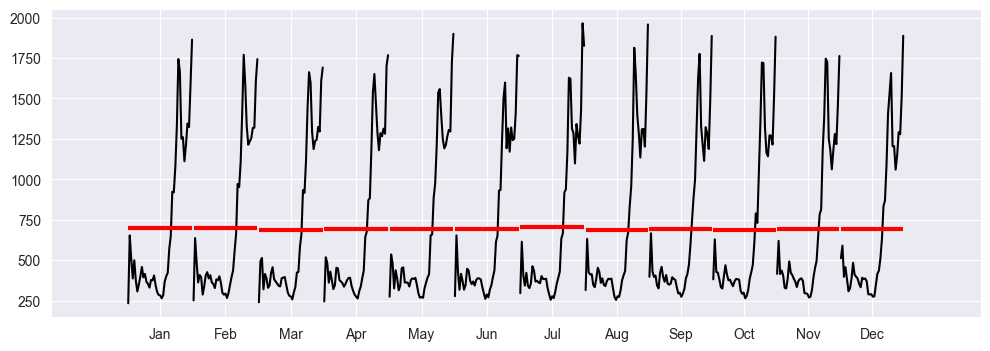

In [33]:
#month plot for US from 1979 to 2021
fig, ax = plt.subplots(figsize = (12,4))
month_plot(df2, ax = ax)
plt.grid()

# **Gold price analysis for Europe**

In [34]:
df3 = df.drop(['United States(USD)', 'Japan(JPY)',
       'United Kingdom(GBP)', 'Canada(CAD)', 'Switzerland(CHF)', 'India(INR)',
       'Saudi Arabia(SAR)', 'Indonesia(IDR)', 'United Arab Emirates(AED)',
       'Thailand(THB)', 'South Korean(KRW)', 'Australia(AUD)',
       'South Africa(ZAR)','year','month'], axis = 1)

In [35]:
df3.head()

,Europe(EUR)
month,
1979-01-31,144.8
1979-02-28,154.6
1979-03-31,148.0
1979-04-30,152.8
1979-05-31,172.0


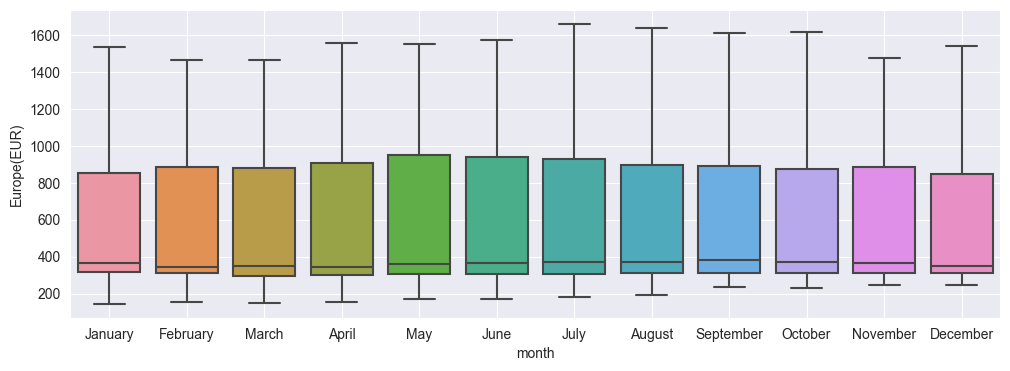

In [36]:
plt.figure(figsize = (12,4))
sns.boxplot(x = df3.index.month_name(), y = df3['Europe(EUR)'])
plt.grid()
plt.show()

In [37]:
df4 = df.drop(['United States(USD)', 'Japan(JPY)', 'Europe(EUR)',
       'United Kingdom(GBP)', 'Canada(CAD)', 'Switzerland(CHF)',
       'Saudi Arabia(SAR)', 'Indonesia(IDR)', 'United Arab Emirates(AED)',
       'Thailand(THB)', 'South Korean(KRW)', 'Australia(AUD)',
       'South Africa(ZAR)','month'], axis = 1)

# **Gold price analysis for India**

In [38]:
df4.head()

,India(INR),year
month,,
1979-01-31,1840.8,1979
1979-02-28,2011.7,1979
1979-03-31,1940.2,1979
1979-04-30,2013.1,1979
1979-05-31,2253.4,1979


In [39]:
df5 = df4.groupby(by = 'year')['India(INR)'].mean()

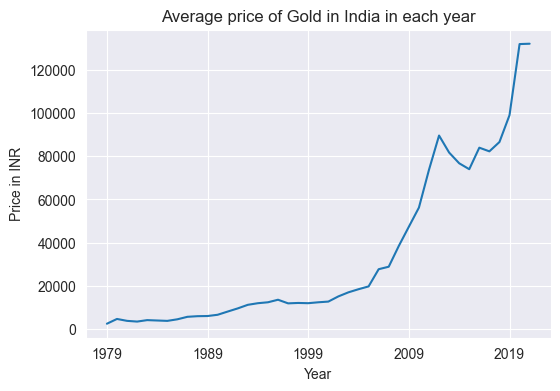

In [40]:
plt.figure(figsize = (6,4))
df5.plot()
plt.grid()
plt.title('Average price of Gold in India in each year')
plt.xlabel('Year')
plt.ylabel('Price in INR')
plt.show()

In [41]:
df6 = df4.drop('year', axis =1)

In [42]:
df6.head()

,India(INR)
month,
1979-01-31,1840.8
1979-02-28,2011.7
1979-03-31,1940.2
1979-04-30,2013.1
1979-05-31,2253.4


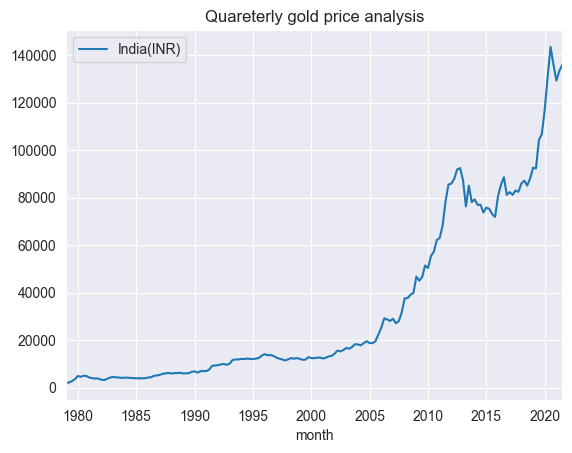

In [43]:
df7 = df6.resample('Q').mean()
df7.plot()
plt.title('Quareterly gold price analysis')
plt.grid()

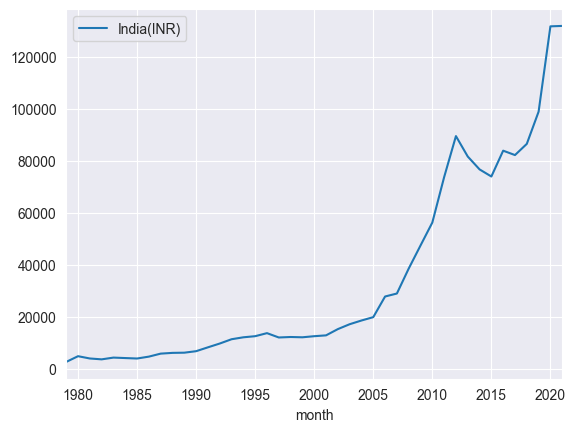

In [44]:
df8 = df6.resample('A').mean()
df8.plot()
plt.grid()

# **Gold price analysis for South Africa**

In [45]:
df9 = df.drop(['United States(USD)','Europe(EUR)','Japan(JPY)','United Kingdom(GBP)','Canada(CAD)',
               'Switzerland(CHF)','India(INR)','Saudi Arabia(SAR)','Indonesia(IDR)','United Arab Emirates(AED)',
               'Thailand(THB)','South Korean(KRW)','Australia(AUD)','year','month'], axis = 1)

In [46]:
df9.head()

,South Africa(ZAR)
month,
1979-01-31,194.5
1979-02-28,209.4
1979-03-31,202.4
1979-04-30,206.9
1979-05-31,233.7


In [47]:
df10 = df9.groupby(by=df9.index.year).mean()
df11 = df9.groupby(by=df9.index.year).std()
df12 = df10.merge(df11, left_index=True, right_index=True)
df12 = df12.rename(columns={'South Africa(ZAR)_x': 'mean', 'South Africa(ZAR)_y': 'std'})
df12['cv'] = (df12['std']/df12['mean'])*100
df12.head()

,mean,std,cv
month,,,
1979,267.991667,73.290548,27.348070
1980,470.875000,44.413903,9.432207
1981,395.358333,12.771094,3.230258
1982,409.891667,59.753698,14.577925
1983,468.358333,24.874282,5.310951


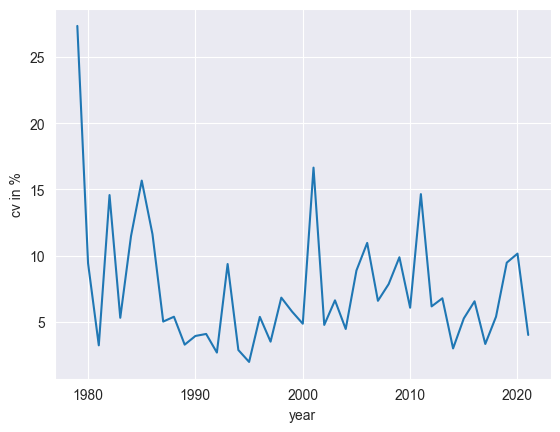

In [48]:
df12['cv'].plot()
plt.ylabel('cv in %')
plt.xlabel('year')
plt.grid()
plt.show()

According to last graph, people who bought gold before 1980 will always be in the loss. People who bought around 1995 will always gain profit.